In [9]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   time                         12316 non-null  object
 1   day_of_week                  12316 non-null  object
 2   age_band_of_driver           12316 non-null  object
 3   sex_of_driver                12316 non-null  object
 4   educational_level            11575 non-null  object
 5   vehicle_driver_relation      11737 non-null  object
 6   driving_experience           11487 non-null  object
 7   type_of_vehicle              11366 non-null  object
 8   owner_of_vehicle             11834 non-null  object
 9   service_year_of_vehicle      8388 non-null   object
 10  defect_of_vehicle            7889 non-null   object
 11  area_accident_occured        12077 non-null  object
 12  lanes_or_medians             11931 non-null  object
 13  road_allignment              12

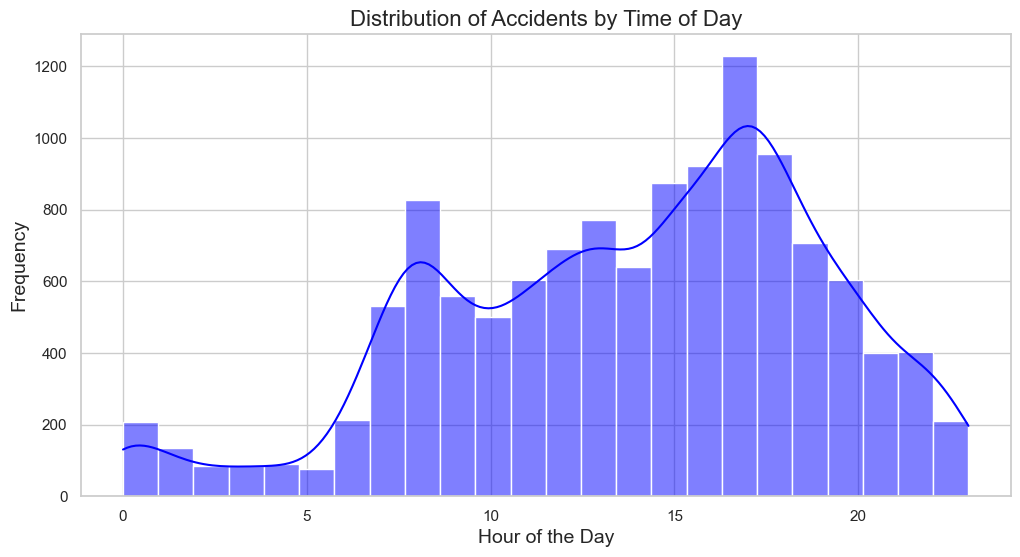

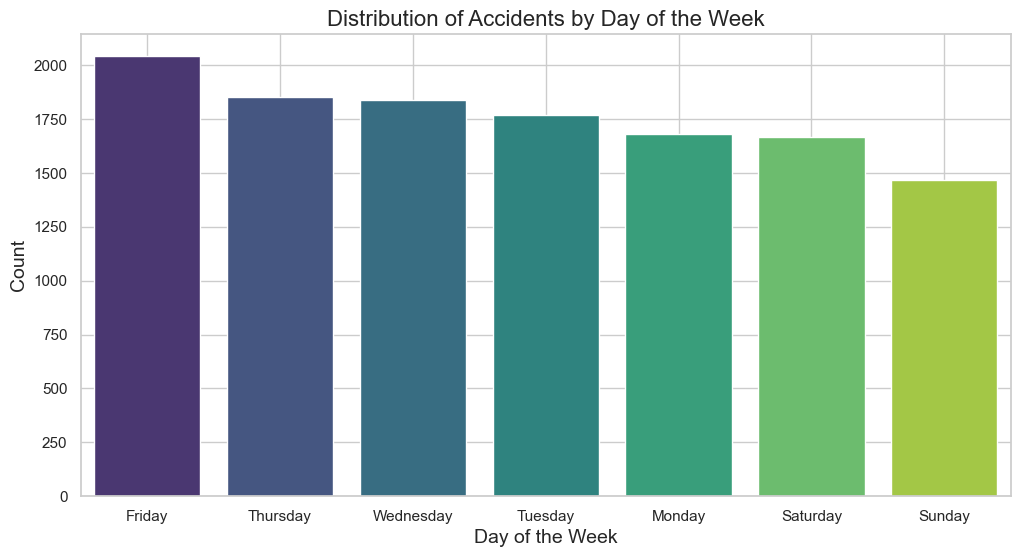

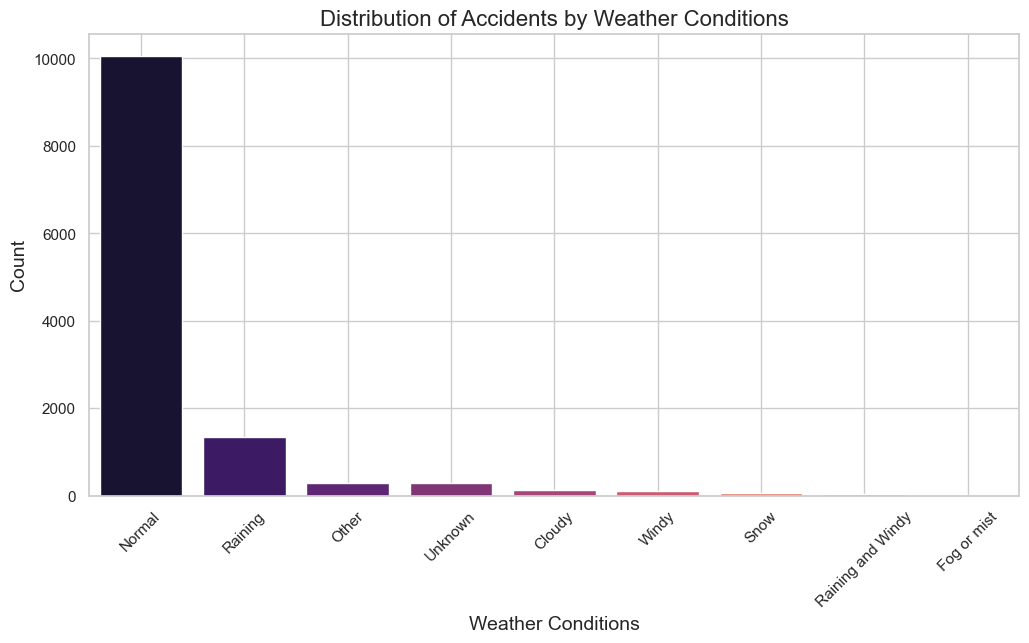

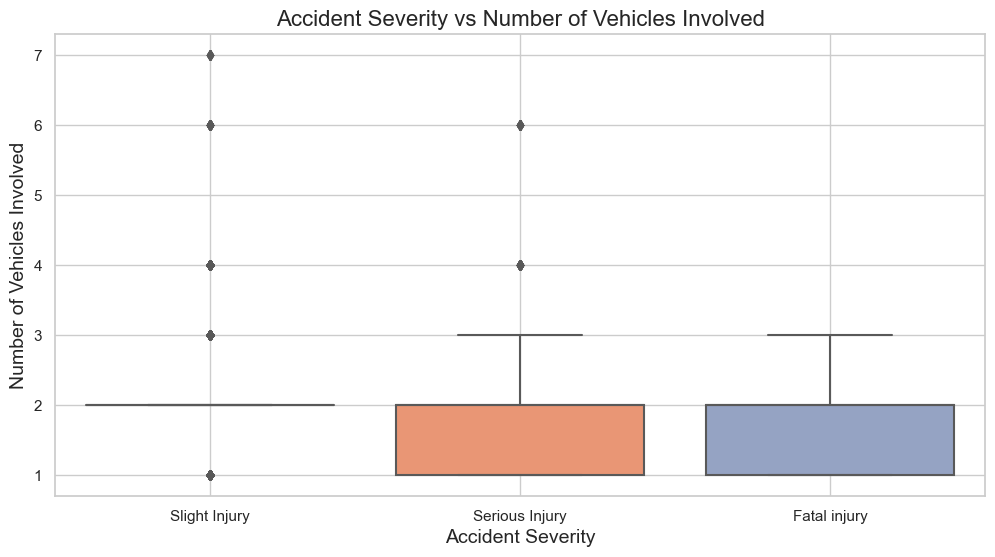

novo1


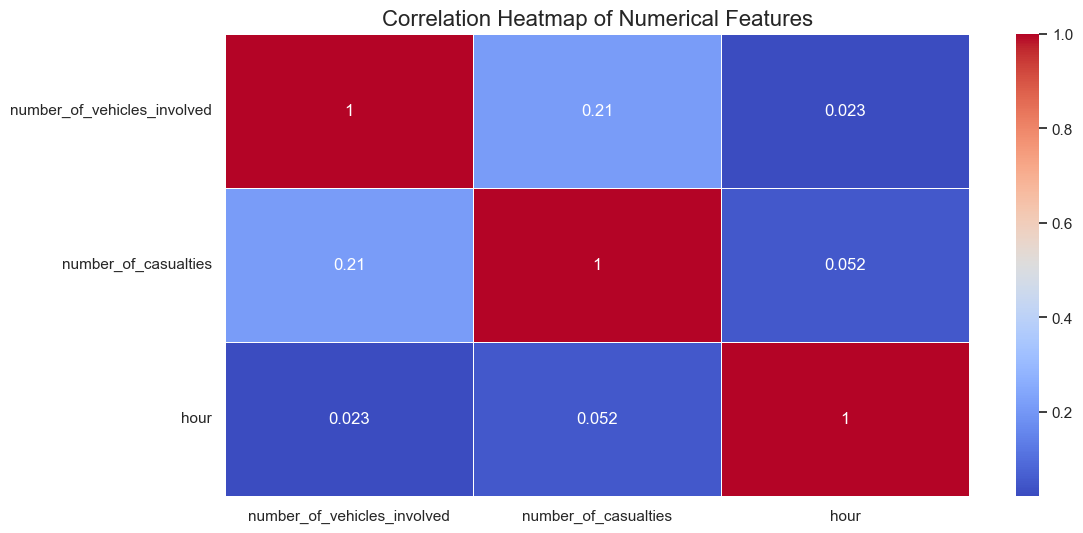

novo2


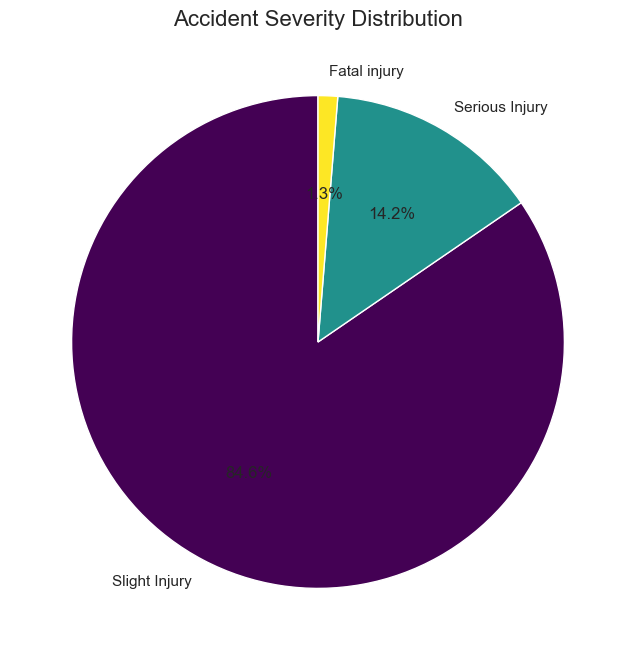

novo4


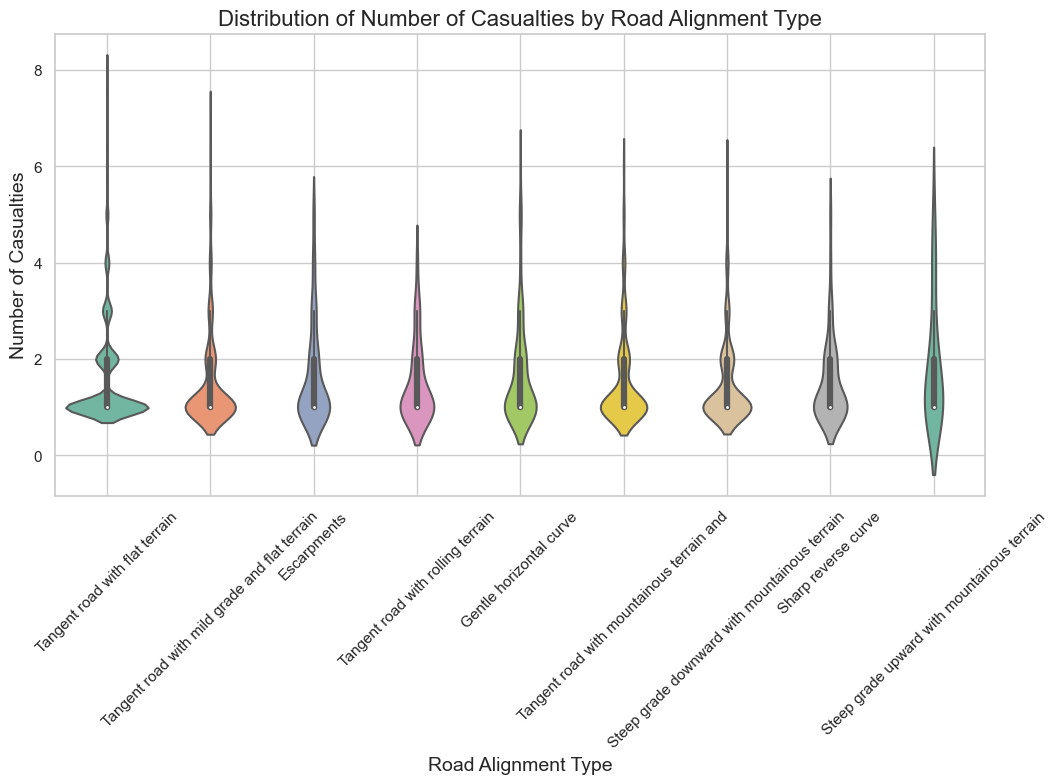

Heatmap of Accident Severity by Hour and Day of the Week


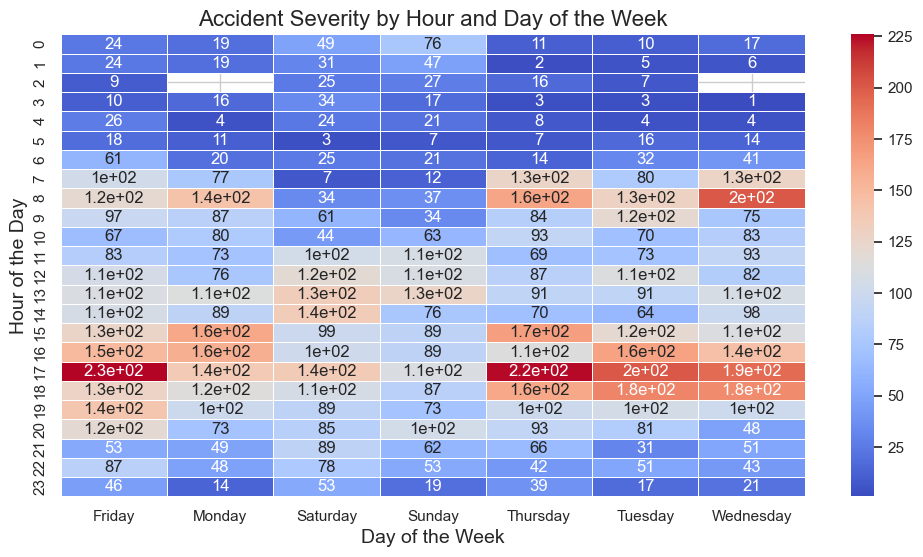

Stacked Bar Chart of Accidents by Weather Condition and Severity


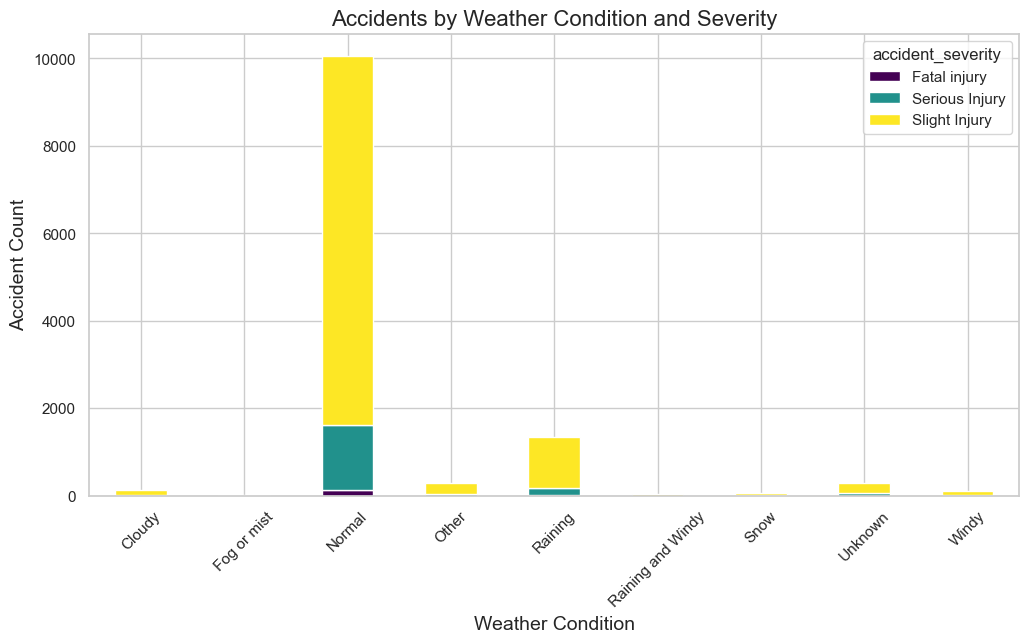

Pairplot of Numerical Features


D:\nlp Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


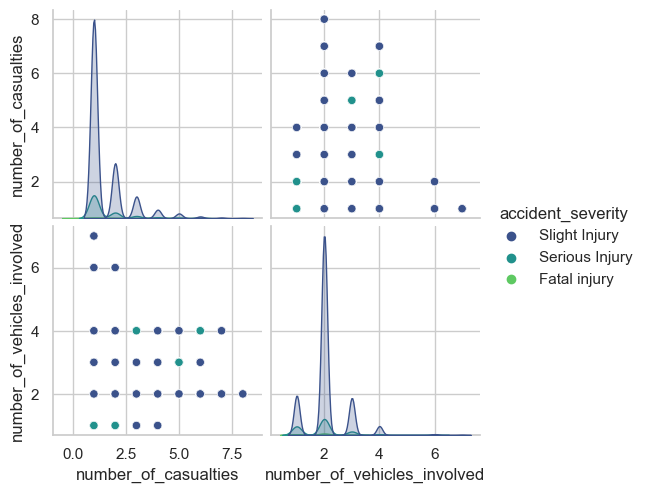

Bar Plot of Top 10 Causes of Accidents


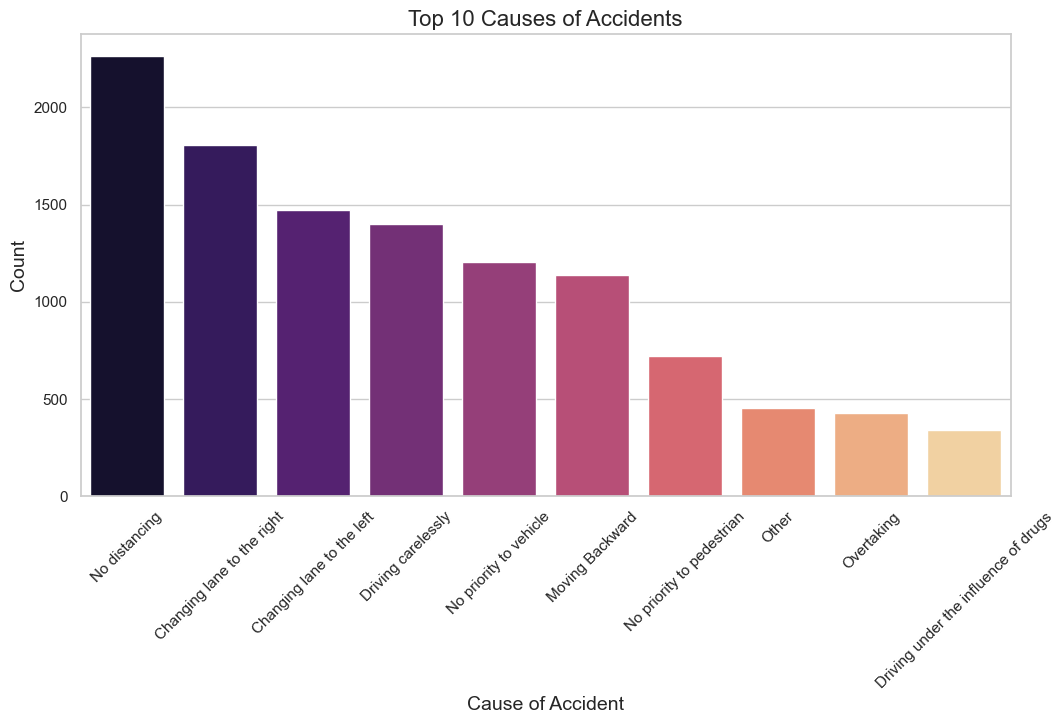

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/kerim/.cache/kagglehub/datasets/saurabhshahane/road-traffic-accidents/versions/3/RTA Dataset.csv')  # Replace backslashes with forward slashes


# Standardize column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Display basic information
print(df.info())
print(df.describe(include='object'))
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Fill missing values
df.fillna(method='ffill', inplace=True)

# Check for duplicates
df.drop_duplicates(inplace=True)
print("\nDuplicate rows removed.")

# Convert 'time' column to datetime format
if 'time' in df.columns:
    df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce')
    df['hour'] = df['time'].dt.hour
    print("\n'Time' column converted and 'Hour' column added.")

# Query 1: Accidents during peak hours (8 AM - 10 AM and 5 PM - 7 PM)
peak_hours_accidents = df[(df['hour'] >= 8) & (df['hour'] <= 10) | (df['hour'] >= 17) & (df['hour'] <= 19)]
print("\nNumber of accidents during peak hours (8 AM - 10 AM and 5 PM - 7 PM):")
print(peak_hours_accidents.shape[0])

# Query 2: Accidents on weekends (Saturday and Sunday)
if 'day_of_week' in df.columns:
    weekend_accidents = df[df['day_of_week'].isin(['Saturday', 'Sunday'])]
    print("\nNumber of accidents on weekends (Saturday and Sunday):")
    print(weekend_accidents.shape[0])

# Query 3: Accidents in adverse weather conditions (Rain, Fog, Snow)
if 'weather_conditions' in df.columns:
    adverse_weather_accidents = df[df['weather_conditions'].isin(['Rain', 'Fog', 'Snow'])]
    print("\nNumber of accidents in adverse weather conditions (Rain, Fog, Snow):")
    print(adverse_weather_accidents.shape[0])

# Query 4: Accidents with high severity
if 'accident_severity' in df.columns:
    high_severity_accidents = df[df['accident_severity'] == 'Fatal injury']
    print("\nNumber of high-severity accidents (Fatal injury):")
    print(high_severity_accidents.shape[0])

# Additional Queries
# Query 5: Accidents by road type
if 'road_type' in df.columns:
    road_type_counts = df['road_type'].value_counts()
    print("\nAccidents by Road Type:")
    print(road_type_counts)

# Query 6: Most common causes of accidents
if 'cause_of_accident' in df.columns:
    cause_counts = df['cause_of_accident'].value_counts().head(10)
    print("\nTop 10 Causes of Accidents:")
    print(cause_counts)

# Query 7: Accidents involving pedestrians
if 'pedestrian_movement' in df.columns:
    pedestrian_accidents = df[df['pedestrian_movement'] != 'Not a Pedestrian']
    print("\nNumber of accidents involving pedestrians:")
    print(pedestrian_accidents.shape[0])
    
    
    
    
print("Query8")
# Query 8: Accidents by driver's age band and gender
if 'age_band_of_driver' in df.columns and 'sex_of_driver' in df.columns:
    age_gender_accidents = df.groupby(['age_band_of_driver', 'sex_of_driver']).size().reset_index(name='accident_count')
    print("\nAccidents by Driver's Age Band and Gender:")
    print(age_gender_accidents)
    
    
print("Query8")    
# Query 9: Accidents by road conditions and severity
if 'road_surface_conditions' in df.columns and 'accident_severity' in df.columns:
    road_severity_accidents = df.groupby(['road_surface_conditions', 'accident_severity']).size().reset_index(name='accident_count')
    print("\nAccidents by Road Surface Conditions and Severity:")
    print(road_severity_accidents)

print("Query8")   
    # Query 10: Accidents involving pedestrians by severity
if 'pedestrian_movement' in df.columns and 'accident_severity' in df.columns:
    pedestrian_severity_accidents = df[df['pedestrian_movement'] != 'Not a Pedestrian'].groupby('accident_severity').size().reset_index(name='accident_count')
    print("\nAccidents Involving Pedestrians by Severity:")
    print(pedestrian_severity_accidents)
    
print("Query8")     
# Query 11: Accidents by vehicle type and severity
if 'type_of_vehicle' in df.columns and 'accident_severity' in df.columns:
    vehicle_severity_accidents = df.groupby(['type_of_vehicle', 'accident_severity']).size().reset_index(name='accident_count')
    print("\nAccidents by Vehicle Type and Severity:")
    print(vehicle_severity_accidents)

    
print("Query8")     
# Query 12: Accidents by Day of the Week and Hour
if 'day_of_week' in df.columns and 'hour' in df.columns:
    day_hour_accidents = df.groupby(['day_of_week', 'hour']).size().reset_index(name='accident_count')
    print("\nAccidents by Day of the Week and Hour:")
    print(day_hour_accidents)
    

    
    

# Data Visualization
sns.set(style="whitegrid")

# 1. Distribution of accidents by time of day
plt.figure(figsize=(12, 6))
sns.histplot(df['hour'], bins=24, kde=True, color='blue')
plt.title('Distribution of Accidents by Time of Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

# 2. Distribution of accidents by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', data=df, palette='viridis', order=df['day_of_week'].value_counts().index)
plt.title('Distribution of Accidents by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.show()

# 3. Distribution of accidents by weather conditions
plt.figure(figsize=(12, 6))
sns.countplot(x='weather_conditions', data=df, palette='magma', order=df['weather_conditions'].value_counts().index)
plt.title('Distribution of Accidents by Weather Conditions', fontsize=16)
plt.xlabel('Weather Conditions', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 4. Box plot of accident severity by number of vehicles involved
plt.figure(figsize=(12, 6))
sns.boxplot(x='accident_severity', y='number_of_vehicles_involved', data=df, palette='Set2')
plt.title('Accident Severity vs Number of Vehicles Involved', fontsize=16)
plt.xlabel('Accident Severity', fontsize=14)
plt.ylabel('Number of Vehicles Involved', fontsize=14)
plt.grid(True)
plt.show()




# 1. Heatmap of correlation between numerical features
print("novo1")
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

# 2. Pie chart of accident severity distribution
print("novo2")
plt.figure(figsize=(8, 8))
df['accident_severity'].value_counts().plot.pie(autopct='%1.1f%%', cmap='viridis', startangle=90)
plt.title('Accident Severity Distribution', fontsize=16)
plt.ylabel('')
plt.show()


# 4. Violin plot of number of casualties by road alignment type
print("novo4")
plt.figure(figsize=(12, 6))
sns.violinplot(x='road_allignment', y='number_of_casualties', data=df, palette='Set2')
plt.title('Distribution of Number of Casualties by Road Alignment Type', fontsize=16)
plt.xlabel('Road Alignment Type', fontsize=14)
plt.ylabel('Number of Casualties', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()







# 1. Heatmap of accident severity by hour and day of the week
print("Heatmap of Accident Severity by Hour and Day of the Week")
pivot_table = df.pivot_table(index='hour', columns='day_of_week', values='accident_severity', aggfunc='count')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Accident Severity by Hour and Day of the Week', fontsize=16)
plt.ylabel('Hour of the Day', fontsize=14)
plt.xlabel('Day of the Week', fontsize=14)
plt.show()


# 2. Stacked bar chart of accidents by weather condition and severity
print("Stacked Bar Chart of Accidents by Weather Condition and Severity")
weather_severity_accidents = df.groupby(['weather_conditions', 'accident_severity']).size().unstack()
weather_severity_accidents.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='viridis')
plt.title('Accidents by Weather Condition and Severity', fontsize=16)
plt.xlabel('Weather Condition', fontsize=14)
plt.ylabel('Accident Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()



# 3. Pairplot of numerical features
print("Pairplot of Numerical Features")
sns.pairplot(df[['number_of_casualties', 'number_of_vehicles_involved', 'accident_severity']], hue='accident_severity', palette='viridis')
plt.show()



# 4. Bar plot of top 10 causes of accidents
print("Bar Plot of Top 10 Causes of Accidents")
cause_counts = df['cause_of_accident'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=cause_counts.index, y=cause_counts.values, palette='magma')
plt.title('Top 10 Causes of Accidents', fontsize=16)
plt.xlabel('Cause of Accident', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()



